<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-Trying-the-impossible" data-toc-modified-id="Introduction:-Trying-the-impossible-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: Trying the impossible</a></span></li><li><span><a href="#Are-all-libraries-that-are-needed-available?" data-toc-modified-id="Are-all-libraries-that-are-needed-available?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Are all libraries that are needed available?</a></span></li><li><span><a href="#Prepare-an-image-provider-class" data-toc-modified-id="Prepare-an-image-provider-class-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare an image provider class</a></span></li><li><span><a href="#Build-a-MLP-model" data-toc-modified-id="Build-a-MLP-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build a MLP model</a></span></li><li><span><a href="#Train-the-MLP-with-images" data-toc-modified-id="Train-the-MLP-with-images-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train the MLP with images</a></span></li></ul></div>

# Introduction: Trying the impossible

A Convolutional Neural Network (NN) consists of two parts. A feature hierarchy with CONV and MAX-Pooling layers and a classificator on top of this feature hierarchy, usually a Multi Layer Perceptron (MLP).

But do we really need this feature hierarchy? Why not use images directly as input for a MLP? Never say never. So let's try the "impossible": learn to classify images without the feature hierarchy. Just using a MLP.

# Are all libraries that are needed available?

In [1]:
import numpy as np
import tensorflow as tf
import keras
import cv2

print( "Your NumPy version is: " + np.__version__ )
print( "Your TensorFlow version is: " + tf.__version__)
print( "Your Keras version is: " + keras.__version__ )
print( "Your OpenCV version is: " + cv2.__version__ )

Using TensorFlow backend.


Your NumPy version is: 1.13.3
Your TensorFlow version is: 1.5.1
Your Keras version is: 2.2.3
Your OpenCV version is: 3.4.1


# Prepare an image provider class

In [31]:
import os
from os import listdir
from os.path import isdir, isfile, join

IMG_SIZE = (300,300)
    
class image_provider:
    
    #
    # Traverses all subfolders of the specified root_folder
    # and generates a list of the form:
    #
    # [ ["data/bikes/jfksdj43.jpg", "bikes",
    #   ["data/cars/bvcnm401.jpg", "cars"],
    #   ...
    # ]
    #
    def __init__(self, root_folder):
        
        self.all_images = []
       
        class_names = \
            [d for d in listdir(root_folder)
             if isdir(os.path.join(root_folder,d))]

        print("Under folder", root_folder, "I found the following subfolders/classes:")
        print(class_names)
        
        for class_name in class_names:
            
            subfolder_name = root_folder + "/" + class_name + "/"
            
            filenames = \
                [subfolder_name + f
                 for f in listdir(subfolder_name) if isfile(join(subfolder_name, f))]
            
            print("{} files in subfolder {}".format(len(filenames), subfolder_name) )
            
            for filename in filenames:
                
                self.all_images.append( [filename, class_name] )              
        
        self.nr_images = len(self.all_images)
        print("There are {} images in total available.".format(self.nr_images))
     
    
    #   
    # Given an absolute filename,
    # load the image in using OpenCV,
    # then convert it to usual RGB color channel order
    # and scale values to be in range [0,1]
    #
    def load_image(self, absolute_filename):
        
        image = cv2.imread(absolute_filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMG_SIZE)
        image = image * (1.0 / 255.0)
        return image
        
    
    #
    # Return an OpenCV image and the class label
    # where the image is chosen randomly from the
    # list of all images.
    #
    def get_random_image(self):
        
        rnd_idx = np.random.randint(0, self.nr_images)
        
        image_filename  = self.all_images[rnd_idx][0]
        image_classname = self.all_images[rnd_idx][1]
        
        image = self.load_image(image_filename)
        
        return image, image_classname

Let's test the image provider class:

In [32]:
my_image_provider = image_provider( "data" )

Under folder data I found the following subfolders/classes:
['bikes', 'cars']
1344 files in subfolder data/bikes/
1307 files in subfolder data/cars/
There are 2651 images in total available.


Let us retrieve randomly one of the images and display it.

image has type <class 'numpy.ndarray'>
image has shape (300, 300, 3)


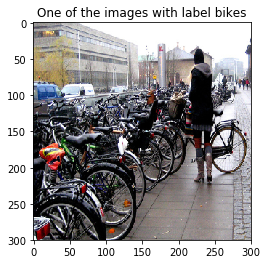

In [34]:
import matplotlib.pyplot as plt

image, label = my_image_provider.get_random_image()
print("image has type", type(image))
print("image has shape", image.shape)
plt.imshow(image)
plt.title("One of the images with label {}".format(label))
plt.show()

# Build a MLP model

In [35]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(3, activation="relu", input_dim=2))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


# Train the MLP with images

In [36]:
NR_TEST_IMAGES = 10

for test_img_nr in range(0,NR_TEST_IMAGES):
    
    if test_img_nr % 100 == 0:
        print("Trained on {} train images so far...".
             format(test_img_nr))

    # Get a random image from the image provider
    image, label = my_image_provider.get_random_image()
    
    print("image has shape", image.shape)
    
    #model.fit(X,Y, epochs=500, verbose=0)

Trained on 0 train images so far...
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
image has shape (300, 300, 3)
